In [1]:
import os
import re
import numpy as np
from scipy import ndimage

import sys
import pickle
import json
import tables

import importlib.util #import from superordinate folder
spec =importlib.util.spec_from_file_location("helper",str(re.search("(.*/)",os.getcwd()).groups(0)[0])+"helper.py")
helper = importlib.util.module_from_spec(spec)
spec.loader.exec_module(helper)

In [2]:
#Now you can zoom
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
with open("child_static_size.json") as fh:
    json = json.load(fh)

In [4]:
mot = tables.open_file("cosmic.mot")

In [5]:
data = mot.root.motion_tensor

In [6]:
hist = helper.weighted_histograms(data, roi = json)

0.0
0.001906250595703311
0.003812501191406622
0.005718751787109934
0.007625002382813244
0.009531252978516556
0.011437503574219868
0.013343754169923177
0.015250004765626489
0.0171562553613298
0.019062505957033113
0.020968756552736424
0.022875007148439735
0.024781257744143047
0.026687508339846355
0.028593758935549666
0.030500009531252977
0.03240626012695629
0.0343125107226596
0.036218761318362915
0.038125011914066226
0.04003126250976954
0.04193751310547285
0.04384376370117616
0.04575001429687947
0.04765626489258278
0.049562515488286094
0.0514687660839894
0.05337501667969271
0.05528126727539602
0.05718751787109933
0.05909376846680264
0.061000019062505954
0.06290626965820927
0.06481252025391258
0.06671877084961589
0.0686250214453192
0.07053127204102251
0.07243752263672583
0.07434377323242913
0.07625002382813245
0.07815627442383576
0.08006252501953907
0.08196877561524238
0.0838750262109457
0.085781276806649
0.08768752740235232
0.08959377799805562
0.09150002859375894
0.09340627918946225
0.09

0.8120627537696106
0.8139690043653138
0.8158752549610172
0.8177815055567205
0.8196877561524238
0.8215940067481271
0.8235002573438304
0.8254065079395337
0.827312758535237
0.8292190091309404
0.8311252597266436
0.833031510322347
0.8349377609180503
0.8368440115137536
0.8387502621094569
0.8406565127051602
0.8425627633008635
0.8444690138965668
0.8463752644922702
0.8482815150879734
0.8501877656836768
0.8520940162793801
0.8540002668750833
0.8559065174707867
0.85781276806649
0.8597190186621934
0.8616252692578966
0.8635315198536
0.8654377704493033
0.8673440210450066
0.8692502716407099
0.8711565222364132
0.8730627728321165
0.8749690234278198
0.8768752740235232
0.8787815246192264
0.8806877752149298
0.8825940258106331
0.8845002764063363
0.8864065270020397
0.888312777597743
0.8902190281934463
0.8921252787891496
0.894031529384853
0.8959377799805562
0.8978440305762595
0.8997502811719629
0.9016565317676661
0.9035627823633695
0.9054690329590728
0.9073752835547761
0.9092815341504794
0.9111877847461828
0.

In [7]:
import matplotlib.pyplot as plt

In [8]:
motion_1d = np.mean(ndimage.gaussian_filter(hist[:,],10),axis =0)
#motion_1d = np.mean(hist[:,],axis =0)

In [9]:
path = os.getcwd()+"/cosmic.eeg"
electrode_names= ['Fz_1', 'F3_1', 'F7_1', 'F9_1', 'FT7_1', 'FC3_1', 'FC1_1', 'Cz_1',
       'C3_1', 'T7_1', 'CP3_1', 'Pz_1', 'P3_1', 'P7_1', 'PO9_1', 'O1_1',
       'O2_1', 'PO10_1', 'P8_1', 'P4_1', 'CP4_1', 'TP10_1', 'T8_1',
       'C4_1', 'FT8_1', 'FC4_1', 'FC2_1', 'F4_1', 'F8_1', 'F10_1', 'V1_1',
       'V2_1', 'Fz_2', 'F3_2', 'F7_2', 'F9_2', 'FT7_2', 'FC3_2', 'FC1_2',
       'Cz_2', 'C3_2', 'T7_2', 'CP3_2', 'Pz_2', 'P3_2', 'P7_2', 'PO9_2',
       'O1_2', 'O2_2', 'PO10_2', 'P8_2', 'P4_2', 'CP4_2', 'TP10_2',
       'T8_2', 'C4_2', 'FT8_2', 'FC4_2', 'FC2_2', 'F4_2', 'F8_2', 'F10_2',
       'V1_2', 'V2_2']
vmrk = "cosmic.vmrk"
exclude = []


In [10]:
eegs1 = helper.frequency_bands_to_common_reference(path, participant = 1, electrode_names = electrode_names, vmrk = vmrk, exclude = exclude)
eegs0 = helper.frequency_bands_to_common_reference(path, participant = 0, electrode_names = electrode_names, vmrk = vmrk, exclude = exclude)
eegs = {**eegs1,**eegs0}

/mnt/c/Users/eler/Documents/Cognitive_Science/Bachelorarbeit/Scripts/processing_pipeline/helper.py:292: RuntimeWarning: Mean of empty slice
  reference = np.nanmean(load_eeg(path,participant=participant),axis = 0)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [11]:
from scipy import signal

[[1.         0.17143336]
 [0.17143336 1.        ]]


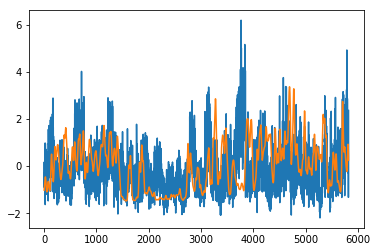

In [12]:
pair = [motion_1d[46142:51961],eegs["alpha_O2_2"][46142:51961]]

pair[0]=pair[0]-pair[0].mean()
pair[1]=pair[1]-pair[1].mean()
pair[1]=pair[1]/pair[1].std()
pair[0]=pair[0]/pair[0].std()

#pair[0]=pair[0]-signal.medfilt(pair[0],3333)


plt.plot(pair[1])
plt.plot(pair[0])
print(np.corrcoef(*pair))

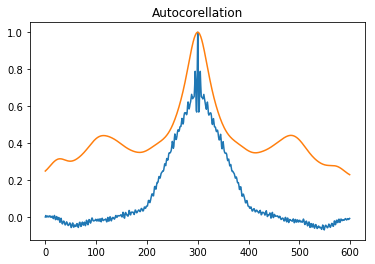

In [13]:
plt.title("Autocorellation")
plt.plot(helper.correlation_shifted(eegs["alpha_T7_1"][46142:51961],eegs["alpha_T7_1"][46142:51961],300)[0])
plt.plot(helper.correlation_shifted(motion_1d[46142:51961],motion_1d[46142:51961],300)[0])

In [14]:
import matplotlib.gridspec as gridspec

.

NameError: name 'axtitles' is not defined

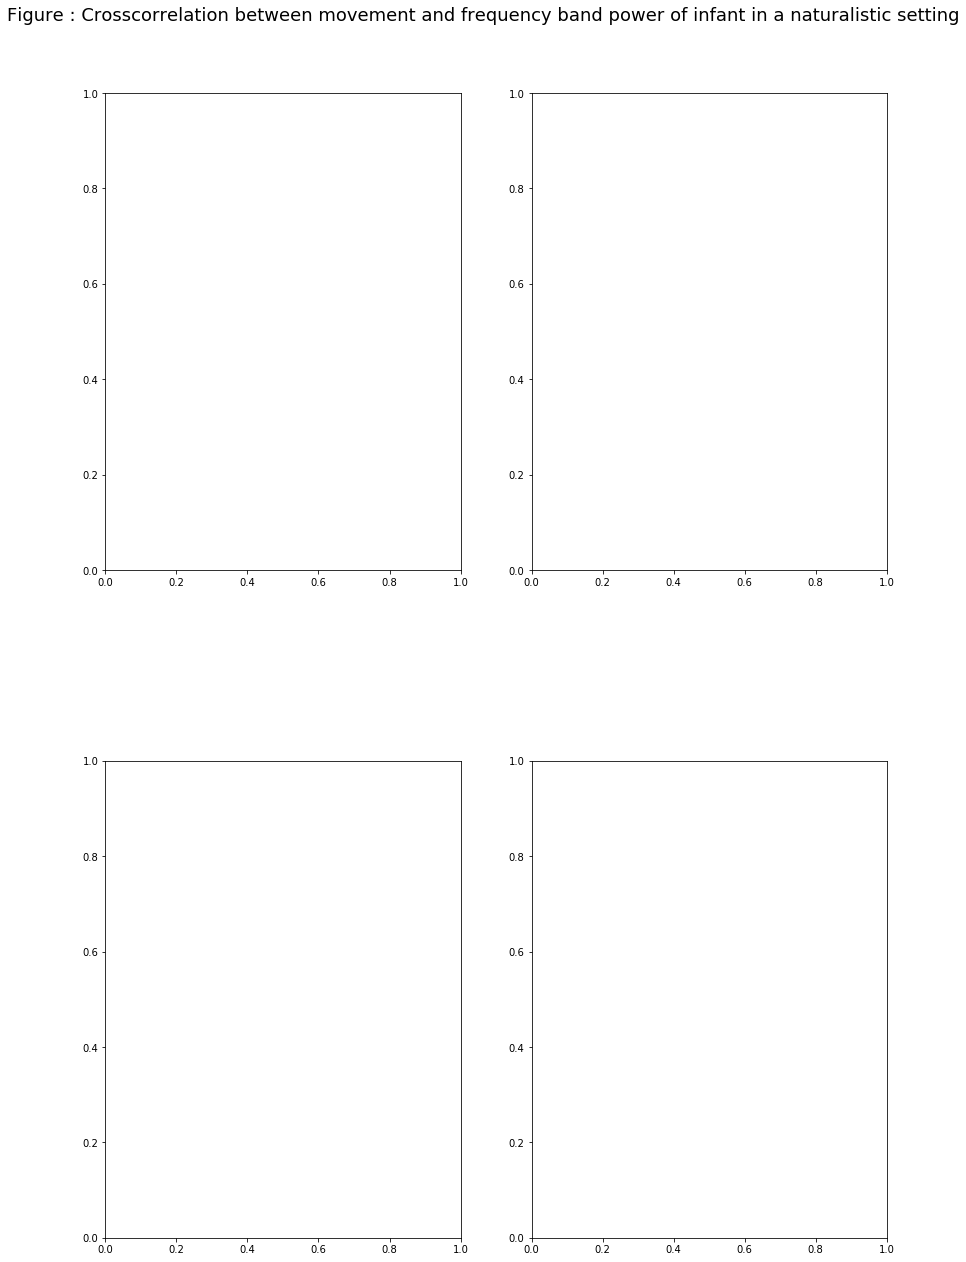

In [15]:
pos_min = 46500
pos_max = 51500

maxshift = 350
corr_p1 = {"alpha":np.zeros(2*maxshift),"beta":np.zeros(2*maxshift),"gamma1":np.zeros(2*maxshift),"gamma2":np.zeros(2*maxshift)}
corr_p2 = {"alpha":np.zeros(2*maxshift),"beta":np.zeros(2*maxshift),"gamma1":np.zeros(2*maxshift),"gamma2":np.zeros(2*maxshift)}

p1_keys = 0
p2_keys = 0
bands = ["alpha","beta","gamma1","gamma2"]

fig = plt.figure(figsize=(14, 20))
fig.subplots_adjust(top=0.92, wspace = 0.2, hspace=.4)

fig.suptitle("Figure : Crosscorrelation between movement and frequency band power of infant in a naturalistic setting", fontsize=18)
gs = gridspec.GridSpec(2, 2,width_ratios=[1, 1],height_ratios=[1,1])

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])

axes = [ax1,ax2,ax3,ax4]


titles = ["Alpha","Beta", "Low Gamma", "High Gammma"]
for k in eegs.keys():
    print(".", end="")
    for band, ax, title in zip(bands,axes, axtitles):
        ax.set_title(tilte)
        if re.search(band, k):
            if re.search("_1",k) and False:
                corr = helper.correlation_shifted(motion_1d[pos_min:pos_max],eegs[k][pos_min:pos_max],maxshift=maxshift)[0]
                corr_p1[band] += corr
                p1_keys += 1

                ax.plot(corr, color = "red")
            elif re.search("_2",k):
                corr = helper.correlation_shifted(motion_1d[pos_min:pos_max],eegs[k][pos_min:pos_max],maxshift=maxshift)[0]
                corr_p2[band] += corr
                ax.plot(corr, color = "blue")
                p2_keys += 1
#corr_p1 /= p1_keys
#corr_p2 /= p2_keys
            
#plt.plot(helper.correlation_shifted(motion_1d[46500:51500],eegs["alpha_Fz_1"][46500:51500],maxshift=400)[0])
#plt.plot(helper.correlation_shifted(motion_1d[46500:51500],eegs["alpha_Fz_2"][46500:51500],maxshift=400)[0])

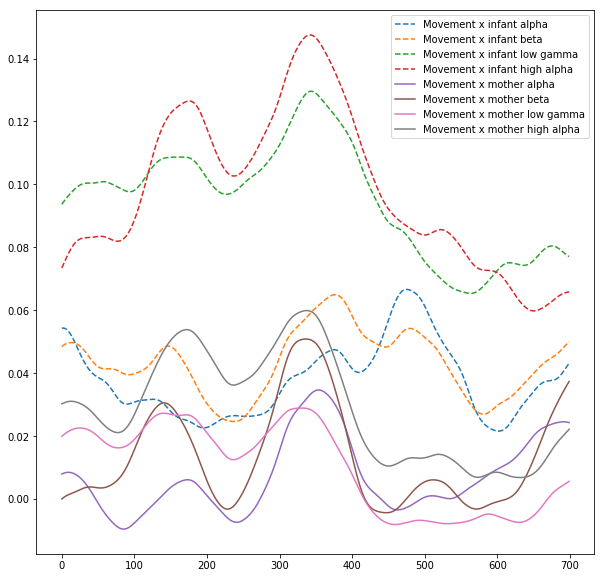

In [44]:
fig =plt.figure(figsize=(10,10))
plt.plot(corr_p2["alpha"]/128, linestyle = "dashed")
plt.plot(corr_p2["beta"]/128, linestyle = "dashed")
plt.plot(corr_p2["gamma1"]/128, linestyle = "dashed")
plt.plot(corr_p2["gamma2"]/128, linestyle = "dashed")


plt.plot(corr_p1["alpha"]/128)
plt.plot(corr_p1["beta"]/128)
plt.plot(corr_p1["gamma1"]/128)
plt.plot(corr_p1["gamma2"]/128)

plt.legend(("Movement x infant alpha","Movement x infant beta","Movement x infant low gamma",
           "Movement x infant high alpha","Movement x mother alpha","Movement x mother beta",
           "Movement x mother low gamma", "Movement x mother high alpha"),
           loc='upper right')

In [ ]:
pair = (motion_1d[46142:51961],eegs["alpha_F7_2"][46142:51961])
plt.scatter(*pair)

print(np.corrcoef(*pair))

# Some checks of shifted_correlation with random numbers and autocorrlated samples

https://stackoverflow.com/questions/33898665/python-generate-array-of-specific-autocorrelation

In [ ]:
plt.plot(helper.correlation_shifted(np.random.randn(1000),np.random.randn(1000),100)[0])

In [ ]:
def sample_signal(n_samples, corr, mu=2, sigma=1):
    assert 0 < corr < 1, "Auto-correlation must be between 0 and 1"

    # Find out the offset `c` and the std of the white noise `sigma_e`
    # that produce a signal with the desired mean and variance.
    # See https://en.wikipedia.org/wiki/Autoregressive_model#Example:_An_AR.281.29_process
    c = mu * (1 - corr)
    sigma_e = np.sqrt((sigma ** 2) * (1 - corr ** 2))

    # Sample the auto-regressive process.
    signal = [c + np.random.normal(0, sigma_e)]
    for _ in range(1, n_samples):
        signal.append(c + corr * signal[-1] + np.random.normal(0, sigma_e))

    return np.array(signal)

In [ ]:
a = sample_signal(1000,.5)
b = sample_signal(1000,.5)

In [ ]:
plt.plot(helper.correlation_shifted(a,b,100)[0])